# Cancer Diagnostics
Unit 3 / Lesson 6 / Project 5

Using [set of breast cancer data](http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29), create a model to predict breast cancer.
Also, what traits are most indicative of whether or not an individual will be diagnosed?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score

## Import data

In [2]:
# import data
PATH = (r'assets\breast_cancer_data.csv')
raw_data = pd.read_csv(PATH,  index_col=0)

df_raw = pd.DataFrame(raw_data)

df_raw.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

## EDA

In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se        

In [4]:
df_raw.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


## Data Cleaning

In [5]:
# drop 'Unnamed: 32' column as it only contains NaNs
display(df_raw.shape)
df_raw = df_raw.dropna(axis=1)
df_raw.shape

(569, 32)

(569, 31)

In [6]:
# view target values
df_raw['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [7]:
# convert target value to categorical
df_raw['diagnosis'] = np.where(df_raw['diagnosis'] == 'M', 1, 0)
df_raw['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [8]:
# store clean data
df_clean = df_raw

## Model Selection

In [9]:
# define data and target
data = df_clean.drop('diagnosis', axis=1)
target = df_clean['diagnosis']

# define training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.2, random_state=42, stratify=target)

### Logistic Regression

In [10]:
# instantiate Logistic Regression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
# Train the classifier
LR.fit(X_train, y_train)
# Test the classifier and get the prediction
y_pred = LR.predict(X_test)

# metrics
print('Logistic Regression')
print('\nAccuracy test set:')
print(accuracy_score(y_test, y_pred))
print('\nMean absolute error test set: ')
print(mean_absolute_error(y_test, y_pred))
print('\nMean squared error test set: ')
print(mean_squared_error(y_test, y_pred))

Logistic Regression

Accuracy test set:
0.9385964912280702

Mean absolute error test set: 
0.06140350877192982

Mean squared error test set: 
0.06140350877192982


C:\Users\Aaron\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Random Forest Classifer

In [11]:
# instantiate Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=10)
RFC.fit(X_train, y_train)
y_pred = RFC.predict(X_test)

# metrics
print('Random Forest Classifier')
print('\nAccuracy test set:')
print(accuracy_score(y_test, y_pred))
print('\nMean absolute error test set: ')
print(mean_absolute_error(y_test, y_pred))
print('\nMean squared error test set: ')
print(mean_squared_error(y_test, y_pred))

Random Forest Classifier

Accuracy test set:
0.9473684210526315

Mean absolute error test set: 
0.05263157894736842

Mean squared error test set: 
0.05263157894736842


### Gradient Boosting Classifier

In [12]:
# Instantiate gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier
CLF = GradientBoostingClassifier(max_depth=2, n_estimators=120)
CLF.fit(X_train, y_train)

errors = [mean_squared_error(y_test, y_pred)
         for y_pred in CLF.staged_predict(X_test)]
best_n_estimators = np.argmin(errors)

CLF_best = GradientBoostingClassifier(max_depth=2, n_estimators=best_n_estimators)
CLF_best.fit(X_train, y_train)
y_pred = CLF_best.predict(X_test)

# metrics
print('Gradient Boosting Classifier')
print('\nAccuracy test set:')
print(accuracy_score(y_test, y_pred))
print('\nMean absolute error test set: ')
print(mean_absolute_error(y_test, y_pred))
print('\nMean squared error test set: ')
print(mean_squared_error(y_test, y_pred))

Gradient Boosting Classifier

Accuracy test set:
0.956140350877193

Mean absolute error test set: 
0.043859649122807015

Mean squared error test set: 
0.043859649122807015


The Gradient Boosting Classifer is our best performing model without overfitting.

## Feature Selection
Drop correlated features and, if necessary, select only top features.

In [13]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
model = GradientBoostingClassifier() 
rfecv = RFECV(estimator=model, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 15
Best features : Index(['texture_mean', 'area_mean', 'concave points_mean', 'texture_se',
       'area_se', 'smoothness_se', 'compactness_se', 'radius_worst',
       'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
       'concavity_worst', 'concave points_worst', 'fractal_dimension_worst'],
      dtype='object')


In [14]:
# Get columns to keep
mask = rfecv.support_ #list of booleans
new_features = data.columns[mask]

#        
data = data[new_features]
display(data.shape)
data.head()

(569, 15)

,texture_mean,area_mean,concave points_mean,texture_se,area_se,smoothness_se,compactness_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,concavity_worst,concave points_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,
842302,10.38,1001.0,0.14710,0.9053,153.40,0.006399,0.04904,25.38,17.33,184.60,2019.0,0.1622,0.7119,0.2654,0.11890
842517,17.77,1326.0,0.07017,0.7339,74.08,0.005225,0.01308,24.99,23.41,158.80,1956.0,0.1238,0.2416,0.1860,0.08902
84300903,21.25,1203.0,0.12790,0.7869,94.03,0.006150,0.04006,23.57,25.53,152.50,1709.0,0.1444,0.4504,0.2430,0.08758
84348301,20.38,386.1,0.10520,1.1560,27.23,0.009110,0.07458,14.91,26.50,98.87,567.7,0.2098,0.6869,0.2575,0.17300
84358402,14.34,1297.0,0.10430,0.7813,94.44,0.011490,0.02461,22.54,16.67,152.20,1575.0,0.1374,0.4000,0.1625,0.07678


### Check for correlation

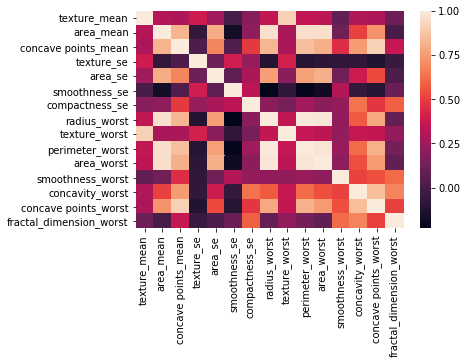

In [15]:
# plot a heatmap
sns.heatmap(data.corr());

In [16]:
# Create correlation matrix
corr_matrix = data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=4).astype(np.bool))

# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

display(data.shape)

# Drop correlated features 
for i in to_drop:
    data = data.drop(i, axis=1)

data.shape

(569, 15)

(569, 10)

Now that our feature set is reduced to only the non-correlated features, we can optimize our model.

## Fine Tune Model

In [17]:
# define training and test set with new features
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.2, random_state=42)

# sample training data
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

In [18]:
# define our parameter ranges
learning_rate=[0.01]
n_estimators=[int(x) for x in np.linspace(start = 10, stop = 500, num = 4)]
max_depth=[int(x) for x in np.linspace(start = 3, stop = 15, num = 4)]
max_depth.append(None)
min_samples_split=[int(x) for x in np.linspace(start = 2, stop = 5, num = 4)]
min_samples_leaf=[int(x) for x in np.linspace(start = 1, stop = 4, num = 4)]
max_features=['auto', 'sqrt']

# Create the random grid
param_grid = {'learning_rate':learning_rate,
              'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
             }

print(param_grid)

# Initialize and fit the model.
from sklearn.model_selection import RandomizedSearchCV
model = GradientBoostingClassifier()
model = RandomizedSearchCV(model, param_grid, cv=3)
model.fit(X_train_sample, y_train_sample)

# get the best parameters
best_params = model.best_params_
print(best_params)

{'learning_rate': [0.01], 'n_estimators': [10, 173, 336, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [3, 7, 11, 15, None], 'min_samples_split': [2, 3, 4, 5], 'min_samples_leaf': [1, 2, 3, 4]}
{'n_estimators': 500, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 7, 'learning_rate': 0.01}


In [19]:
# refit model with best parameters
model_best = GradientBoostingClassifier(**best_params)
# Train the classifier 
model_best.fit(X_train, y_train)
# Test the classifier and get the prediction
y_pred = model_best.predict(X_test)

# create a dictionary to hold our metrics
metrics_dict = {}

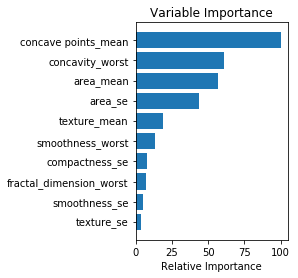

In [20]:
# view top features
feature_importance = model_best.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5

plt.subplot(1,2,2)
plt.barh(pos, feature_importance[sorted_idx], align='center')

plt.yticks(pos, data.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [21]:
# sort top features
top_features = np.where(feature_importance > 25)
top_features = data.columns[top_features].ravel()
print(top_features)

['area_mean' 'concave points_mean' 'area_se' 'concavity_worst']


In [22]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

#
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the train dataset: 100.0%


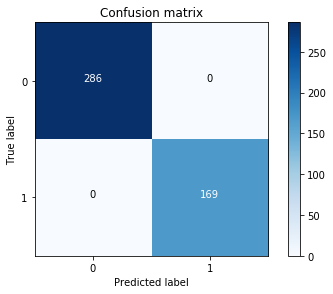

In [23]:
#
y_pred_train = model_best.predict(X_train)
cnf_matrix_tra = confusion_matrix(y_train, y_pred_train)

#
metrics_dict['Train recall metric'] = 100*cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+cnf_matrix_tra[1,1])
print("Recall metric in the train dataset: {}%".format(metrics_dict['Train recall metric'])
     )

#
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()

Recall metric in the testing dataset: 95.34883720930233%


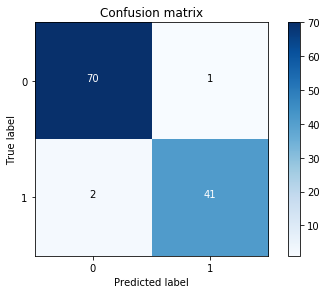

In [24]:
cnf_matrix = confusion_matrix(y_test, y_pred)

metrics_dict['Test recall metric']=100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])
print("Recall metric in the testing dataset: {}%".format(metrics_dict['Test recall metric'])
     )
#print("Precision metric in the testing dataset: {}%".format(
#    100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0]))
#     )
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()

In [25]:
# metrics
print('Optimized Gradient Boosting Classifier')
print('\nAccuracy test set:')
print(accuracy_score(y_test, y_pred))
print('\nMean absolute error test set: ')
print(mean_absolute_error(y_test, y_pred))
print('\nMean squared error test set: ')
print(mean_squared_error(y_test, y_pred))

# top features
print('\nTop indicators:')
print(top_features)

Optimized Gradient Boosting Classifier

Accuracy test set:
0.9736842105263158

Mean absolute error test set: 
0.02631578947368421

Mean squared error test set: 
0.02631578947368421

Top indicators:
['area_mean' 'concave points_mean' 'area_se' 'concavity_worst']


## Conclusion
We've cleaned our data, selected our top features, and optimized our model.
Our final model has an accuracy of ~97% and we've determined the top five indicators of a malignant tissue mass.